# Pythonプログラムの解説

## 参考にしたコード

- ノードの形・色・枠線の変更

https://github.com/cytoscape/cytoscape-automation/blob/master/for-scripters/Python/Overview-of-py4cytoscape.ipynb

- ファイルのインポート

https://github.com/cytoscape/cytoscape-automation/blob/master/for-scripters/Python/importing-data-from-tables.ipynb
https://github.com/cytoscape/cytoscape-automation/blob/master/for-scripters/Python/importing-network-from-table.ipynb

## 実行環境
- Python 3.10.4
- Cytoscape 3.11.0-SNAPSHOT
- py4cytoscape 1.11.0

## Jupyter-Bridge をセットアップ

Cytoscape と Jupyter 環境を橋渡しするための設定（jupyter-bridge）をします。

具体的には、ローカルの Cytoscape とリモートの Notebook の間で通信可能にする JavaScript と Python の仕組みが読み込まれます。



In [89]:
import requests
exec(requests.get("https://raw.githubusercontent.com/cytoscape/jupyter-bridge/master/client/p4c_init.py").text)
IPython.display.Javascript(_PY4CYTOSCAPE_BROWSER_CLIENT_JS) # Start browser client

Skip reloading Javascript client ... 7ce47dce-c289-4777-9f4e-48be62321576 on https://jupyter-bridge.cytoscape.org


<IPython.core.display.Javascript object>

## py4cytoscapeをインポート

Cytoscapeをあらかじめ開いておき、py4cytoscapeを使いCytoscapeと接続できているか確認します。



In [90]:
import py4cytoscape as p4c
p4c.cytoscape_ping()
p4c.cytoscape_version_info()

You are connected to Cytoscape!


{'apiVersion': 'v1',
 'cytoscapeVersion': '3.11.0-SNAPSHOT',
 'automationAPIVersion': '1.12.0',
 'py4cytoscapeVersion': '1.12.0'}

## ネットワーク（sif）、ノード属性（tsv）をCytoscapeにインポート

In [91]:
import os
import sys
import pandas as pd

In [92]:
#ネットワークファイルを必ず先にインポートします
p4c.import_network_from_file('7network.sif')

{'networks': [114655], 'views': [123771]}

In [93]:
#ノード属性のtsvファイルをpandasで読みます。
#tsvファイルはTabで分けられているので、tab区切りにして読み込みます。
#ファイルに日本語を含むので、文字化けを無くすためutf-8で読み込ませます。
node7 = pd.read_csv('7node.tsv', sep='\t', encoding='utf-8')
print(node7)

       ID      所属  コミュニティ
0    2104   第5開発部       3
1    2304   第2開発部       2
2    2301   第1開発部       3
3     819  コーポレート       4
4     822  コーポレート       4
..    ...     ...     ...
142   127   第2開発部       2
143   115  コーポレート       0
144   221   第3開発部       1
145   147   第4開発部       0
146    35   第4開発部       0

[147 rows x 3 columns]


In [94]:
#なかなかtsvファイルをCytoscapeに渡すことができず原因を調べたところ、
#原因はtsvファイルのID列の型が整数型になっていることでした。
print(node7.dtypes)


ID         int64
所属        object
コミュニティ     int64
dtype: object


In [95]:
#IDを文字列に変更させます（int64 → object）
node7['ID'] = node7['ID'].astype(str)
print(node7.dtypes)


ID        object
所属        object
コミュニティ     int64
dtype: object


In [96]:
#pandasで読み込ませた属性tsvファイルをCytoscapeに渡す
p4c.load_table_data(node7, data_key_column='ID')

'Success: Data loaded in defaultnode table'

## py4cytoscapeを使いグラフの見た目を調整する

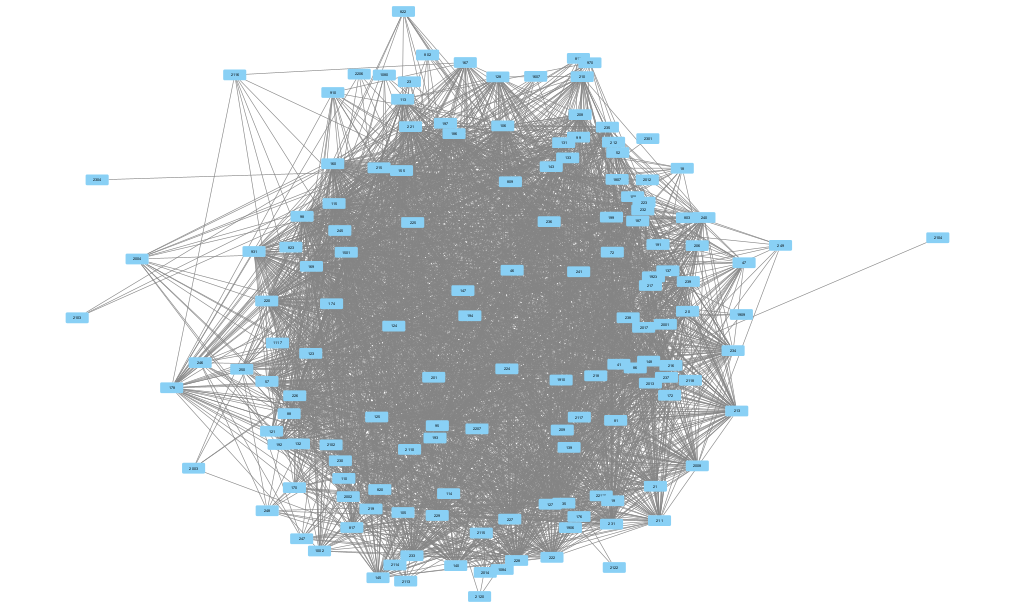

In [97]:
#現時点のグラフ
p4c.notebook_export_show_image()

In [98]:
p4c.set_visual_style('default')
# force-directed レイアウトでノード間隔を広げる
p4c.layout_network('force-directed defaultSpringLength=500')
# ノードのサイズを小さくする
p4c.set_node_size_default(40)
#エッジの太さを細くする
p4c.set_edge_line_width_default(1)

style_name not specified, so updating "default" style.
style_name not specified, so updating "default" style.
style_name not specified, so updating "default" style.


''

In [99]:
print(node7['所属'].unique())


['第5開発部' '第2開発部' '第1開発部' 'コーポレート' '第3開発部' '第4開発部' 'システム開発部']


In [105]:
p4c.set_node_color_mapping(
    name='所属',
    mappings=[
        {'key': '第1開発部', 'value': '#FF6666'},  # 赤系
        {'key': '第2開発部', 'value': '#66B2FF'},  # 青系
    ]
)

TypeError: set_node_color_mapping() got an unexpected keyword argument 'name'